<a href="https://colab.research.google.com/github/ZOORoman/MMO/blob/master/DZ_MMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи

Задача состоит из следующих шагов:

1.	Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2.	Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3.	Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4.	Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5.	Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6.	Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7.	Формирование обучающей и тестовой выборок на основе исходного набора данных.
8.	Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9.	Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10.	Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11.	Формирование выводов о качестве построенных моделей на основе выбранных метрик.


# Выполнения домашнего задания

## Описание датасета
Исходные данные содержат информацию об авиационных происшествиях и катастрофах. В датасет входят столбцы:
* Идентификатор события (Event.id)
* Тип расследования (Investigation.Type)
* Идентификатор происшествия (Accident.Number)
* Дата происшествия (Event.Date)
* Район происшествия (Location)
* Страна (Country)
* Широта (Latitude)
* Долгота (Longtitude)
* Код Аэропорта (Airport.Code)
* Название аэропорта (Airport.Name)
* Тяжесть травм (Injury.Severity)
* Повреждения самолета (Aircraft.Damage)
* Тип самолета (Aircraft.Category)
* Регистрационный номер (Registration.Number)
* Make (Производитель)
* Model (Модель самолета)
* Amateur.Built ()
* Number.of.Engines (Число двигателей)
* Тип двигателя (Engine.Type)
* Описание события от FAR (FAR.Description)
* График движения (Schedule)
* Цель полета (Purpose.of.Flight)
* Название авиаперевозчика (Air.Carrier)
* Итоговое число смертей (Total.Fatal.Injuries)
* Итоговое число серьезно травмированных (Total.Serious.Injuries)
* Итоговое число несерьезно травмированных (Total.Minor.Injuries)
* Итоговое число непострадавших (Total.Uninjured)
* Состояние погоды (Weather.Condition)
* Фаза полета (Broad.Phase.of.Flight)
* Статус отчета (Report.Status)
* Дата публикации отчета (Publication.Date)





In [0]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

data = pd.read_csv('data/DZ/AviationData.csv', sep=",", encoding="windows-1251", parse_dates=True)

## Разведочный анализ и предобработка данных

In [0]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20181217X10943,Accident,GAA19CA098,2018-12-16,"Grangville, ID",United States,45.583611,-115.681667,PVT,NaN,...,Positioning,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,2018-12-18
1,20181217X25746,Accident,GAA19CA097,2018-12-15,"MORIARTY, NM",United States,34.970000,-106.000000,NaN,MORIARTY MUNI,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-20
2,20181213X41114,Accident,ERA19LA065,2018-12-13,"Punta Gorda, FL",United States,26.925278,-82.001111,PGD,Punta Gorda,...,Personal,NaN,NaN,NaN,1.0,NaN,VMC,APPROACH,Preliminary,2018-12-21
3,20181213X45528,Accident,CEN19FA044,2018-12-13,"Valparaiso, IN",United States,41.451667,-87.004444,VPZ,Porter County Rgnl,...,Personal,NaN,1.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,2018-12-19
4,20181214X90303,Accident,GAA19CA096,2018-12-11,"Hartford, WI",United States,43.330278,-88.326111,HXF,Hartford Muni,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-18


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82635 entries, 0 to 82634
Data columns (total 31 columns):
Event.Id                  82635 non-null object
Investigation.Type        82634 non-null object
Accident.Number           82635 non-null object
Event.Date                82635 non-null object
Location                  82560 non-null object
Country                   82128 non-null object
Latitude                  28732 non-null float64
Longitude                 28723 non-null float64
Airport.Code              46776 non-null object
Airport.Name              49514 non-null object
Injury.Severity           82635 non-null object
Aircraft.Damage           80043 non-null object
Aircraft.Category         25900 non-null object
Registration.Number       79053 non-null object
Make                      82562 non-null object
Model                     82533 non-null object
Amateur.Built             82008 non-null object
Number.of.Engines         78026 non-null float64
Engine.Type             

<b>Преобразуем дату в удобоваримый формат

In [0]:
data['date'] = pd.to_datetime(data['Event.Date'], 
                             format='%Y-%m-%d', utc=True)
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

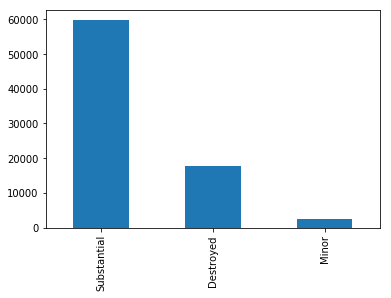

In [0]:
data['Aircraft.Damage'].value_counts().plot(kind='bar')

<b>Просмотрим, в какой фазе полета обычно происходят происшествия

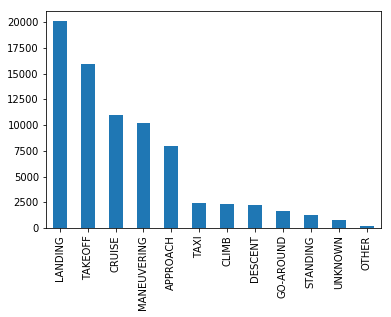

In [0]:
data['Broad.Phase.of.Flight'].value_counts().plot(kind='bar')

<b>Удалим не интересующие нас поля. Снова отобразим датасет

In [0]:
data=data.drop(['Schedule','Air.Carrier','FAR.Description','Event.Id','Accident.Number','Longitude',
                'Broad.Phase.of.Flight','Purpose.of.Flight','Aircraft.Category','Event.Date','Amateur.Built',
                'Airport.Name','Registration.Number','Publication.Date','Latitude', 'Airport.Code'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82635 entries, 0 to 82634
Data columns (total 18 columns):
Investigation.Type        82634 non-null object
Location                  82560 non-null object
Country                   82128 non-null object
Injury.Severity           82635 non-null object
Aircraft.Damage           80043 non-null object
Make                      82562 non-null object
Model                     82533 non-null object
Number.of.Engines         78026 non-null float64
Engine.Type               78653 non-null object
Total.Fatal.Injuries      56668 non-null float64
Total.Serious.Injuries    54169 non-null float64
Total.Minor.Injuries      55347 non-null float64
Total.Uninjured           68840 non-null float64
Weather.Condition         79927 non-null object
Report.Status             82635 non-null object
date                      82635 non-null datetime64[ns, UTC]
month                     82635 non-null int64
year                      82635 non-null int64
dtypes: dat

#### Заполним пустые значения с пострадавшими нулями

In [0]:
values = {'Total.Fatal.Injuries': 0, 'Total.Serious.Injuries': 0, 'Total.Minor.Injuries': 0, 'Total.Uninjured': 0}
data = data.fillna(value=values)

In [0]:
data = data.dropna(axis = 0, how = 'any')
data.shape

(73996, 18)

#### Посмотрим на число смертей по датам
Можем сделать вывод, что число смертей в авиапроисшествиях значительно снизилось к началу 21-го века  

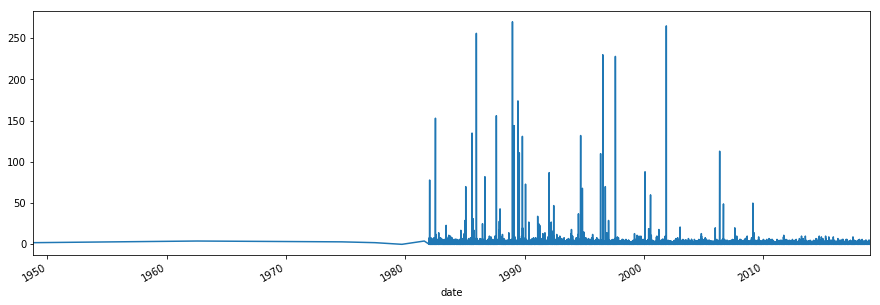

In [0]:
data.set_index('date')['Total.Fatal.Injuries'].plot(figsize=(15, 5))

<b>Просмотрим типы двигателей аварийных самолетов

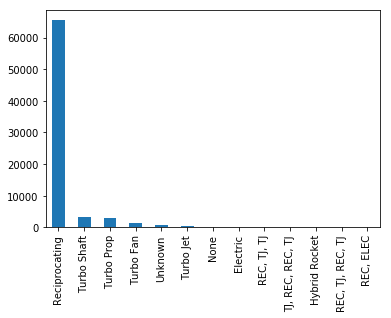

In [0]:
data['Engine.Type'].value_counts().plot(kind='bar')

<b>Закодируем категориальные признаки

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in data.columns:
    dt = str(data[i].dtype)
    if dt == 'object' or dt=='datetime64[ns, UTC]':
        data[i] = le.fit_transform(data[i])   

<b>Построим корреляционную матрицу

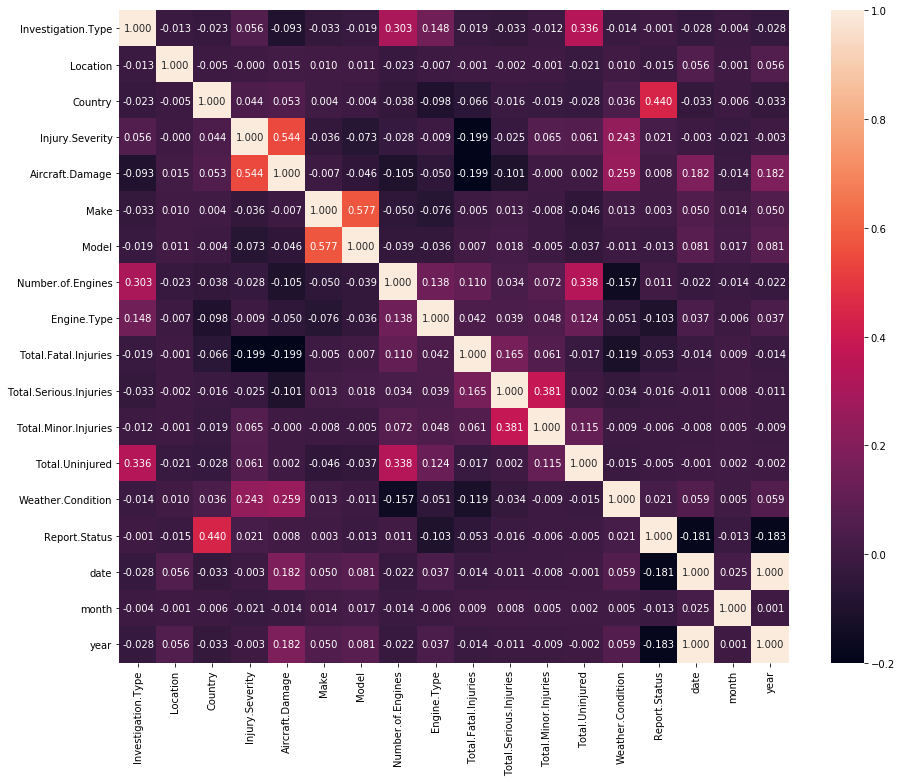

In [0]:
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(data.corr(), annot=True, fmt='.3f', ax=ax)

#### Выводы из построенной корреляционной матрицы
    
* Месяц и год (дата) происшесвия слабо коррелируют с остальными признаками -> удаляем.
* Report.Status слабо коррелирует с остальными данными -> удаляем.
* Make и Model слабо коррелируют с остальными данными -> удаляем. (Между собой сильно коррелируют, что понятно)
* Остальные параметры имеют вменяемую степень корреляции -> следует их оставить.

In [0]:
#Удаление слабо коррелирующих колонок
data=data.drop(['month','date','Make','Model','Report.Status','Total.Minor.Injuries','Total.Uninjured',
                'Country','Engine.Type','Location', 'Investigation.Type'], axis=1)

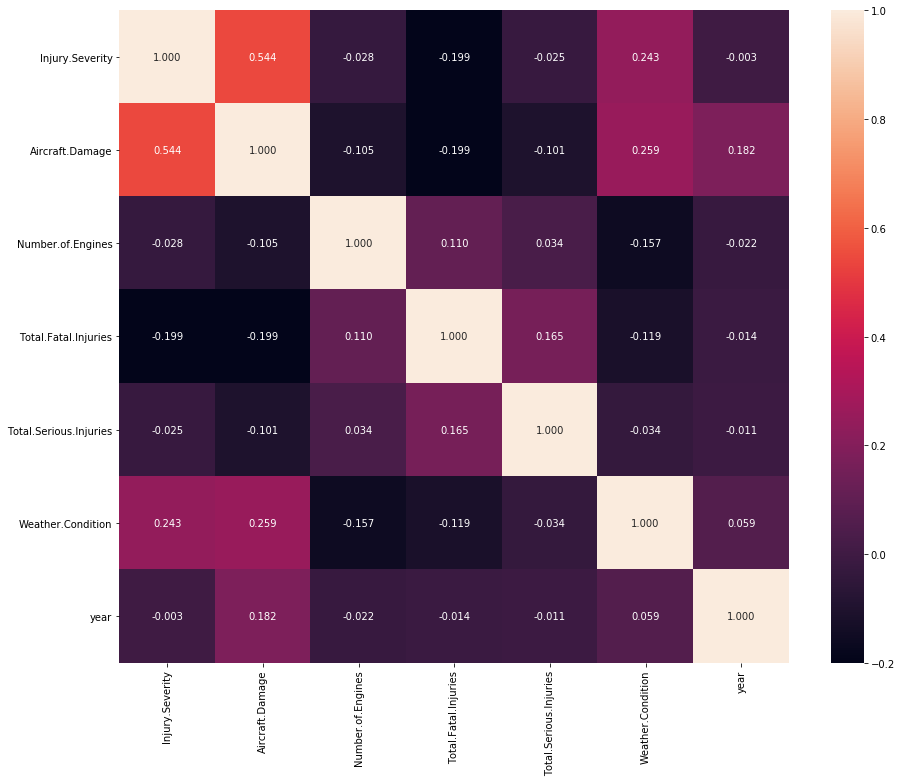

In [0]:
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(data.corr(), annot=True, fmt='.3f', ax=ax)

## Выбор метрик

Для оценки качества моделей будем использовать следующие метрики:
- Средняя абсолютная ошибка - по ней легко судить о средней оценке ошибки;
- Медиана абсолютной ошибки - другая средняя оценка ошибки, для дополнительной оценки средней абсолютной;
- Объяснимая вариация - вариация изучаемого признака,  зависящая  от  значений признака, положенного  в основу.

In [0]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error, r2_score

## Выбор моделей

В качестве простой модели используем линейную модель стохастического градиентного спуска, у которого будем менять функцию потерь ($loss$) и скорость обучения ($learning rate$)

In [0]:
from sklearn.linear_model import SGDRegressor

In [0]:
#МГУА
from gmdhpy.gmdh import MultilayerGMDH

In [0]:
from sklearn.neighbors import KNeighborsRegressor

В качестве более сложной модели используем дерево решений, у которого изначально поставим $max depth = 3$.

In [0]:
from sklearn.tree import DecisionTreeRegressor

Из ансамблевых моделей воспользуемся случайным лесом с исходными $n estimators = 10$ и $max depth = 3$.

In [0]:
from sklearn.ensemble import RandomForestRegressor

## Разделение выборки на обучающую и тестовую



In [0]:
from sklearn.model_selection import train_test_split
fatal = data['Aircraft.Damage']
input_data = data.drop(['Aircraft.Damage'], axis=1)
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    input_data, fatal, test_size=0.18, random_state=1)

In [0]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data_X_train)
data_X_train = transformer.fit_transform(data_X_train)

transformer = Normalizer().fit(data_X_test)
data_X_test = transformer.fit_transform(data_X_test)

#transformer = Normalizer().fit(data_y_train)
#data_y_train = transformer.transform(data_y_train)

#transformer = Normalizer().fit(data_y_test)
#data_y_test = transformer.transform(data_y_test)

## Базовое решение (baseline)

Для начала предварительно подготовим класс Regressor, который будет собирать необходимые параметры для обучения:

In [0]:
template_header = "Модель {}"
template = "Значение по метрике {}: {:.2f}"

In [0]:
class Regressor():
  def __init__(self, method, metrics, x_train, y_train, x_test, y_test):
    self._method = method
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self._metrics = metrics
    self.target_1 = []
   
  def training(self):
    self._method.fit(self.x_train, self.y_train)
    self.target_1 = self._method.predict(self.x_test)
    
  def result(self):
    print(template_header.format(self._method))
    for metric in self._metrics:
      print(template.format(metric.__name__, metric(self.y_test, self.target_1)))

In [0]:
choosed_metrics = [explained_variance_score, 
                   mean_absolute_error, 
                   median_absolute_error,
                   r2_score]
choosed_models = [SGDRegressor(),                
                  KNeighborsRegressor(n_neighbors=6),
                  DecisionTreeRegressor(max_depth=4), 
                  RandomForestRegressor(n_estimators=10, max_depth=4)]

Обучим выбранные модели и проверим выбранными метриками.

In [0]:
for model in choosed_models:
  regressor = Regressor(model, choosed_metrics, data_X_train, 
                        data_y_train, data_X_test, data_y_test)
  regressor.training()
  regressor.result()

Модель SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)
Значение по метрике explained_variance_score: 0.01
Значение по метрике mean_absolute_error: 0.69
Значение по метрике median_absolute_error: 0.46
Значение по метрике r2_score: 0.01
Модель KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=6, p=2,
          weights='uniform')
Значение по метрике explained_variance_score: 0.41
Значение по метрике mean_absolute_error: 0.35
Значение по метрике median_absolute_error: 0.00
Значение по метрике r2_score: 0.41
Модель DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
    

In [0]:
from gmdhpy.gmdh import MultilayerGMDH

model = MultilayerGMDH()
model.fit(data_X_train, data_y_train)
y_pred = model.predict(data_X_test)

result = explained_variance_score(data_y_test, y_pred)
print('EVS={}'.format(result))

result = mean_absolute_error(data_y_test, y_pred)
print('MAE={}'.format(result))

result = median_absolute_error(data_y_test, y_pred)
print('MedAE={}'.format(result))

result = r2_score(data_y_test, y_pred)
print('R2={}'.format(result))

train layer0 in 2.30 sec
train layer1 in 10.67 sec
train layer2 in 11.02 sec
train layer3 in 11.11 sec
train layer4 in 10.60 sec
train layer5 in 10.86 sec
train layer6 in 10.71 sec
train layer7 in 10.85 sec
EVS=0.40569921728360525
MAE=0.42117021414933675
MedAE=0.18719356260515418
R2=0.4056326019877634


In [0]:
y_pred

array([1.87913396, 1.87623047, 1.88496251, ..., 1.89081994, 0.45602996,
       1.81687668])

## Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [0]:
from sklearn.model_selection import ShuffleSplit
choosed_cv = ShuffleSplit(n_splits=3, test_size=0.35)

tuned_parameters_1 = [{'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 
                         'squared_epsilon_insensitive'], 
                        'learning_rate':['constant', 'optimal', 'invscaling']}]
n_range = np.array(range(1,12,1))
tuned_parameters_2 = [{'max_depth': n_range}]
n_range2 = np.array(range(1, 15, 1))
tuned_parameters_3 = [{'n_estimators': n_range2, 'max_depth': n_range}]
n_range3 = np.array(range(1, 25, 2))
tuned_parameters_4 = [{'n_neighbors': n_range3}]

In [0]:
from sklearn.model_selection import GridSearchCV

rg_sgd_gs = GridSearchCV(SGDRegressor(), tuned_parameters_1, 
                         cv=choosed_cv, scoring='explained_variance')
rg_sgd_gs.fit(data_X_train, data_y_train)
rg_sgd_gs.best_params_

{'learning_rate': 'optimal', 'loss': 'epsilon_insensitive'}

In [0]:
rg_dtr_gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters_2, 
                         cv=choosed_cv, scoring='explained_variance')
rg_dtr_gs.fit(data_X_train, data_y_train)
rg_dtr_gs.best_params_

{'max_depth': 6}

In [0]:
rg_dtr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters_4, 
                         cv=choosed_cv, scoring='explained_variance')
rg_dtr_gs.fit(data_X_train, data_y_train)
rg_dtr_gs.best_params_

{'n_neighbors': 23}

In [0]:
rg_rfr_gs = GridSearchCV(RandomForestRegressor(), tuned_parameters_3, 
                         cv=choosed_cv, scoring='explained_variance')
rg_rfr_gs.fit(data_X_train, data_y_train)
rg_rfr_gs.best_params_

{'max_depth': 7, 'n_estimators': 14}

## Сравнение модели с произвольным и лучшим параметром K

Обучим модели на исходных гиперпараметрах и оптимизированных гиперпараметрах.

In [0]:
choosed_and_optimized_models = [SGDRegressor(),
                                SGDRegressor(learning_rate='invscaling',
                                            loss='squared_loss'),
                                KNeighborsRegressor(n_neighbors=6),
                                KNeighborsRegressor(n_neighbors=23),
                                DecisionTreeRegressor(max_depth=4),
                                DecisionTreeRegressor(max_depth=6),
                                RandomForestRegressor(n_estimators=10, 
                                                      max_depth=7),
                                RandomForestRegressor(n_estimators=14, 
                                                      max_depth=7)]

In [0]:
for model in choosed_and_optimized_models:
  regressor = Regressor(model, choosed_metrics, data_X_train, 
                        data_y_train, data_X_test, data_y_test)
  regressor.training()
  regressor.result()
  print('-'*50)

Модель SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)
Значение по метрике explained_variance_score: 0.01
Значение по метрике mean_absolute_error: 0.69
Значение по метрике median_absolute_error: 0.46
Значение по метрике r2_score: 0.01
--------------------------------------------------
Модель SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=Fa

# Выводы

По полученным моделям и значениям можно сделать следующие выводы:

* Регрессор градиентного спуска имел наилучшую конфигурацию при стандартных настройках;
* Регрессор вел себя неадекватно;
* Для DecisionTreeRegressor и RandomForestRegressor критично задавать оптимальные гиперпараметры, это улучшает точность на порядок;
* Наилучшим образом себя показала модель на RandomForestRegressor благодаря ансамблевому методу. Она объясняет 51% всей вариации признака типа повреждений самолета.

# Литература

1. Dataset: https://www.kaggle.com/khsamaha/aviation-accident-database-synopses
2. Model evaluation: quantifying the quality of predictions: https://scikit-learn.org/stable/modules/model_evaluation.html
3. Model selection: choosing estimators and their parameters: https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
4. SGDRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
5. DecisionTreeRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
6. RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

